In [1]:
import geopandas as gpd
Crosses_U_turns = gpd.read_file("Crosses_U_turns_segmented.shp")
Tasadofat_96_97_98 = gpd.read_file("Tasadofat_Neyshaboor_Sabzevar96_97_98_Segmented1.shp")

In [2]:
Crosses_U_turns.head()

,OBJECTID,Name,Segment,geometry
0,1,U_Turns,58,POINT Z (654949.974 4009154.867 0.000)
1,2,U_Turns,58,POINT Z (652609.828 4007888.659 0.000)
2,3,U_Turns,58,POINT Z (651488.789 4007239.460 0.000)
3,4,U_Turns,58,POINT Z (649281.942 4005952.597 0.000)
4,5,U_Turns,57,POINT Z (648535.628 4005474.764 0.000)


In [3]:
# Drop unneeded rows
Tasadofat_96_97_98 = Tasadofat_96_97_98.drop(columns= Tasadofat_96_97_98.columns[0:116])
Tasadofat_96_97_98.head()

,Seg_name,Long_,Lat,ID,Unique_ID,Seg_Cluste,id_1,V1,Symbology_,geometry
0,59,58.778848,36.237378,42.0,59-42,59-0,1.0,0.0,59-0,POINT (659849.322 4011744.759)
1,58,58.739444,36.221944,42.0,58-42,58-0,2.0,0.0,58-0,POINT (656338.846 4009968.371)
2,59,58.779169,36.237341,44.0,59-44,59-0,3.0,0.0,59-0,POINT (659878.254 4011741.249)
3,59,58.758239,36.231234,20.0,59-20,59-1,4.0,1.0,59-1,POINT (658009.534 4011029.401)
4,59,58.769115,36.236176,30.0,59-30,59-2,5.0,2.0,59-2,POINT (658977.042 4011595.446)


In [4]:
# Maintain the original indexing, re-indexing, and drop 18 rows which do not possess a segment
Tasadofat_96_97_98["OID"] = Tasadofat_96_97_98.index
Tasadofat_96_97_98.sort_values(by= "Long_", ascending= False, inplace= True, ignore_index= True)
# Tasadofat_96_97_98.drop(Tasadofat_96_97_98.index[0:18], inplace= True)
Tasadofat_96_97_98.head()

,Seg_name,Long_,Lat,ID,Unique_ID,Seg_Cluste,id_1,V1,Symbology_,geometry,OID
0,0,58.844224,36.185586,18.0,-18,None-No,0.0,0.0,0,POINT (665834.000 4006109.000),871
1,0,58.843926,36.185653,17.0,-17,None-No,0.0,0.0,0,POINT (665807.000 4006116.000),863
2,0,58.843625,36.185708,16.0,-16,None-No,0.0,0.0,0,POINT (665779.833 4006121.569),413
3,0,58.843118,36.185810,15.0,-15,None-No,0.0,0.0,0,POINT (665734.000 4006132.000),867
4,0,58.828524,36.195634,14.0,-14,None-No,0.0,0.0,0,POINT (664401.000 4007197.000),870


In [5]:
import pandas as pd
SPF_data = pd.read_excel("spf.data.4.401.xlsx", header= 2)
SPF_data.head()

,Seg,Y,X1,X2,X3,X4,Alt1,Alt2,Alt3,Alt4,Alt5,Alt6,Alt7,Alt8
0,59,49,4.344300,8076.666667,0.920747,4,794,705,679,494,0,0,0,0
1,58,44,9.025771,8076.666667,0.997145,9,195,589,440,217,100,579,166,0
2,57,35,9.401453,8076.666667,0.744566,7,322,335,484,155,100,254,0,0
3,56,1,0.685524,8076.666667,0.000000,0,0,0,0,0,0,0,0,0
4,55,5,1.494137,8076.666667,0.669283,1,531,0,0,0,0,0,0,0


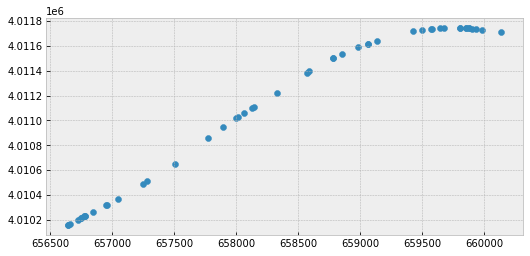

In [6]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
Tasadofat_96_97_98.loc[Tasadofat_96_97_98["Seg_name"] == 59].plot(figsize=(10,4))
plt.show()

C:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\geopandas\plotting.py:407: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

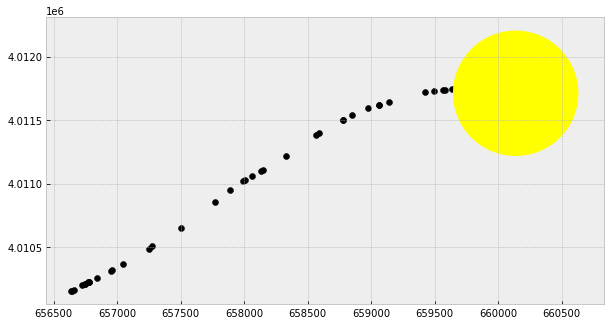

In [66]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

Tasadofat_96_97_98.loc[Tasadofat_96_97_98["Seg_name"] == int("{}".format(seg_code))]["geometry"][j:j+1].buffer(distance=distance).plot(ax = ax, color = 'red')
Tasadofat_96_97_98.loc[Tasadofat_96_97_98["Seg_name"] == int("{}".format(seg_code))].plot(ax = ax, color= "black")
Tasadofat_96_97_98.loc[Tasadofat_96_97_98["Seg_name"] == int("{}".format(seg_code))]["geometry"][j:j+1].plot(ax = ax, color = 'white')
Buf.plot(ax=ax, color = "yellow")

In [16]:
seg_code=59
i=1
j=24

distance= SPF_data[SPF_data["Seg"] == int("{}".format(seg_code))]["Alt{}".format(i)].values[0]
Selected_Tasadofat = Tasadofat_96_97_98[Tasadofat_96_97_98["Seg_name"] == int("{}".format(seg_code))]
Start_point = Selected_Tasadofat[j:j+1]
Buf = Start_point["geometry"].buffer(distance= distance)
Acc_counts_list = Selected_Tasadofat[Selected_Tasadofat.intersects(Buf[Buf.index.values[0]])][Selected_Tasadofat[Selected_Tasadofat.intersects(Buf[Buf.index.values[0]])]["geometry"].x.values <= Start_point["geometry"].x.values]


In [29]:
Selected_Tasadofat[23:24].

,Seg_name,Long_,Lat,ID,Unique_ID,Seg_Cluste,id_1,V1,Symbology_,geometry,OID
41,59,58.764722,36.234444,26.0,59-26,59-2,428.0,2.0,59-2,POINT (658585.744 4011396.127),754


In [28]:
Start_point

,Seg_name,Long_,Lat,ID,Unique_ID,Seg_Cluste,id_1,V1,Symbology_,geometry,OID
42,59,58.764503,36.234319,25.0,59-25,59-2,847.0,2.0,59-2,POINT (658566.275 4011381.901),572


In [83]:
(Selected_Tasadofat[j-1:j]["geometry"].x.values[0] - Start_point["geometry"].x.values[0]) < 20

True

In [82]:
(Selected_Tasadofat[j-1:j]["geometry"].x.values[0] - Start_point["geometry"].x.values[0]) > 19

False

In [33]:
j = 5
for i in range(0,5):
    while j > 1:
        j = j - 1
        
        print(i,j)

0 4
0 3
0 2
0 1


In [47]:
j, j2

(47, 47)

In [30]:
my_list = []

for seg_code in range(1,60):
    Selected_Tasadofat = Tasadofat_96_97_98[Tasadofat_96_97_98["Seg_name"] == int("{}".format(seg_code))]
    Selected_CUT = Crosses_U_turns[Crosses_U_turns["Segment"] == int("{}".format(seg_code))]
    
    for i in range(1,9):
        distance= SPF_data[SPF_data["Seg"] == int("{}".format(seg_code))]["Alt{}".format(i)].values[0]
        if distance == 0:
            continue
        else:            
            for j in range(0,len(Selected_Tasadofat)-1):
                Selected_Tasadofat = Tasadofat_96_97_98[Tasadofat_96_97_98["Seg_name"] == int("{}".format(seg_code))]
                Start_point = Selected_Tasadofat[j:j+1]
                index = Start_point.index.values[0]
                Unique_ID = Start_point["Unique_ID"].values[0]
                Buf = Start_point["geometry"].buffer(distance= distance)
                Acc_counts_list = Selected_Tasadofat[Selected_Tasadofat.intersects(Buf[Buf.index.values[0]])][Selected_Tasadofat[Selected_Tasadofat.intersects(Buf[Buf.index.values[0]])]["geometry"].x.values <= Start_point["geometry"].x.values]
                j2 = j
                if len(Acc_counts_list) < 2:
                    #print("if-1")
                    continue
                
                elif (j == 0):
                    #print("elif-1")
                    Acc_counts = (Selected_Tasadofat[Selected_Tasadofat.intersects(Buf[Buf.index.values[0]])]["geometry"].x.values <= Start_point["geometry"].x.values).sum()
                    CUT_counts = (Selected_CUT[Selected_CUT.intersects(Buf.buffer(50)[Buf.index.values[0]])]["geometry"].x.values <= (Start_point["geometry"].x.values + 50)).sum()
                    my_list.append(['{}'.format(seg_code), '{}'.format(Unique_ID), '{}'.format(distance), '{}'.format(index), '{}'.format(Acc_counts), '{}'.format(CUT_counts)])
                    
                elif Start_point["geometry"].x.values[0] == Selected_Tasadofat[j-1:j]["geometry"].x.values[0]:
                    if Start_point["geometry"].x.values[0] == Selected_Tasadofat[j+1:j+2]["geometry"].x.values[0]:
                        #print("if-2")
                        continue
                    else:
                        if (Selected_Tasadofat[j-1:j]["geometry"].x.values[0] - Start_point["geometry"].x.values[0]) > 19:
                            Acc_counts = (Selected_Tasadofat[Selected_Tasadofat.intersects(Buf[Buf.index.values[0]])]["geometry"].x.values <= Start_point["geometry"].x.values).sum()
                            CUT_counts = (Selected_CUT[Selected_CUT.intersects(Buf.buffer(50)[Buf.index.values[0]])]["geometry"].x.values <= (Start_point["geometry"].x.values + 50)).sum()
                            my_list.append(['{}'.format(seg_code), '{}'.format(Unique_ID), '{}'.format(distance), '{}'.format(index), '{}'.format(Acc_counts), '{}'.format(CUT_counts)])
                        else:
                            continue
                    
                elif (Selected_Tasadofat[j-1:j]["geometry"].x.values[0] - Start_point["geometry"].x.values[0]) < 20:
                    while (Selected_Tasadofat[j2:j2 + 1]["geometry"].x.values[0] - Start_point["geometry"].x.values[0]) < 20:
                        if j2 < len(Acc_counts_list):
                            j2 += 1
                        else:
                            #print("elif-2")
                            break
                    Start_point2 = Selected_Tasadofat[j2:j2 + 1]        
                    if j2 != j:
                        Acc_counts = (Selected_Tasadofat[Selected_Tasadofat.intersects(Buf[Buf.index.values[0]])]["geometry"].x.values <= Start_point2["geometry"].x.values).sum()
                        CUT_counts = (Selected_CUT[Selected_CUT.intersects(Buf.buffer(50)[Buf.index.values[0]])]["geometry"].x.values <= (Start_point2["geometry"].x.values + 50)).sum()
                        my_list.append(['{}'.format(seg_code), '{}'.format(Unique_ID), '{}'.format(distance), '{}'.format(index), '{}'.format(Acc_counts), '{}'.format(CUT_counts)])
                    
                elif (Selected_Tasadofat[j-1:j]["geometry"].x.values[0] - Start_point["geometry"].x.values[0]) > 19:
                    #print("elif-3")
                    Acc_counts = (Selected_Tasadofat[Selected_Tasadofat.intersects(Buf[Buf.index.values[0]])]["geometry"].x.values <= Start_point["geometry"].x.values).sum()
                    CUT_counts = (Selected_CUT[Selected_CUT.intersects(Buf.buffer(50)[Buf.index.values[0]])]["geometry"].x.values <= (Start_point["geometry"].x.values + 50)).sum()
                    my_list.append(['{}'.format(seg_code), '{}'.format(Unique_ID), '{}'.format(distance), '{}'.format(index), '{}'.format(Acc_counts), '{}'.format(CUT_counts)])

In [31]:
Stats = pd.DataFrame(columns = ['Seg_code', 'Unique_ID', 'Distance', 'Index', 'Acc_counts', "CUT_counts"])
Stats = Stats.append(pd.DataFrame(my_list, columns=['Seg_code', 'Unique_ID', 'Distance', 'Index', 'Acc_counts', "CUT_counts"]))

In [32]:
Stats.to_excel("Stats_V8.xlsx")

In [51]:
my_list

[['59', '59-49', '794', '18', '16', '2'],
 ['59', '59-48', '794', '19', '15', '1'],
 ['59', '59-47', '794', '20', '14', '1'],
 ['59', '59-46', '794', '21', '14', '1'],
 ['59', '59-45', '794', '22', '13', '1'],
 ['59', '59-42', '794', '24', '11', '1'],
 ['59', '59-41', '794', '26', '11', '1'],
 ['59', '59-39', '794', '28', '10', '1'],
 ['59', '59-38', '794', '29', '9', '1'],
 ['59', '59-37', '794', '30', '9', '1'],
 ['59', '59-35', '794', '32', '9', '1'],
 ['59', '59-34', '794', '33', '8', '0'],
 ['59', '59-33', '794', '34', '9', '0'],
 ['59', '59-32', '794', '35', '8', '0'],
 ['59', '59-30', '794', '37', '7', '0'],
 ['59', '59-29', '794', '38', '6', '1'],
 ['59', '59-28', '794', '39', '7', '1'],
 ['59', '59-26', '794', '41', '8', '1'],
 ['59', '59-24', '794', '43', '8', '1'],
 ['59', '59-23', '794', '44', '8', '1'],
 ['59', '59-21', '794', '46', '6', '0'],
 ['59', '59-20', '794', '47', '5', '0'],
 ['59', '59-18', '794', '49', '5', '0'],
 ['59', '59-17', '794', '50', '4', '0'],
 ['59', 

In [13]:
len(Acc_counts_list)

1